<a href="https://colab.research.google.com/github/Anzhir/simple_projects/blob/master/mnistANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mnist
import numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD ,Adam
from keras.layers import Dropout
import matplotlib.pyplot as plt
import cv2 

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Scale the images.
train_images = (train_images / 255) 
test_images = (test_images / 255) 

# Flatten the images.
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')
])
# Compile the model.

model.compile(
  optimizer=SGD(learning_rate=0.01),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history=model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=30,
  batch_size=32 , validation_data=(test_images , to_categorical(test_labels))
)

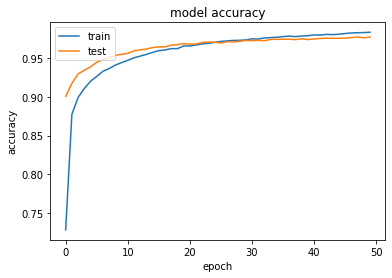

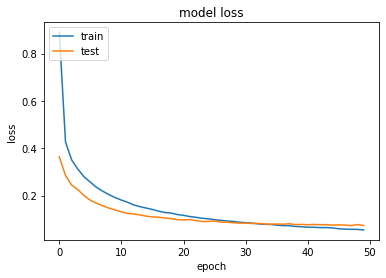

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

7

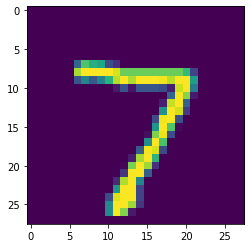

In [ ]:
img=test_images[0].reshape((1,784)) #create batch of 1
plt.imshow(test_images[0].reshape((28,28)))
test_labels[0]

In [ ]:
np.argmax(model.predict(img))

array([[1.08703352e-06, 7.41516305e-06, 2.57263426e-04, 1.05238105e-04,
        7.20635285e-07, 4.09526621e-07, 5.64088110e-09, 9.99532342e-01,
        4.71146535e-07, 9.51012698e-05]], dtype=float32)